In [95]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

def metrics(arr: np.ndarray):
    """Calculate the metrics"""
    
    n = (~np.isnan(arr)).sum(axis=0)

    # precision
    prec = np.nanstd(arr, axis=0) / np.sqrt(n)

    # coefficient of precision
    cop = np.exp(-prec)

    # confidence
    conf = n / arr.shape[0]

    # self-consistency of the response
    if (conf == 0).all():
        scr = conf
    else:
        scr = cop * conf

    return prec, cop, conf, scr


========== 3a bulk modulus ==========
LLaMP      | prec:  2.698 | cop:  0.900 | conf:  1.000 | scr:  0.900 | acc: 14.574
GPT-3.5    | prec:  1.524 | cop:  0.762 | conf:  1.000 | scr:  0.762 | acc: 42.875
GPT-4      | prec:  0.186 | cop:  0.910 | conf:  1.000 | scr:  0.910 | acc: 41.225
Gemini-Pro | prec:  6.065 | cop:  0.169 | conf:  1.000 | scr:  0.169 | acc: 43.429
Llama 3    | prec: 11.222 | cop:  0.010 | conf:  1.000 | scr:  0.010 | acc: 41.874
========== 3b formation energy ==========
LLaMP      | prec:  0.001 | cop:  0.999 | conf:  0.950 | scr:  0.949 | acc:  0.001
GPT-3.5    | prec:  0.374 | cop:  0.698 | conf:  1.000 | scr:  0.698 | acc:  1.756
GPT-4      | prec:  0.000 | cop:  1.000 | conf:  0.225 | scr:  0.250 | acc:  1.680
Gemini-Pro | prec:  0.371 | cop:  0.724 | conf:  1.000 | scr:  0.724 | acc:  1.549
Llama 3    | prec:  2.540 | cop:  0.137 | conf:  0.950 | scr:  0.135 | acc:  5.536
========== 3c band gap ==========
LLaMP      | prec:  0.000 | cop:  1.000 | conf:  1.000 |

/Users/la-cyrusyc/miniconda3/envs/llamp/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/qc/6pnlhsws26726shcx36vg9l40000gq/T/ipykernel_26024/315968760.py:188: RuntimeWarning: Mean of empty slice
  avg, std = np.nanmean(values, axis=0), np.nanstd(values, axis=0)
/var/folders/qc/6pnlhsws26726shcx36vg9l40000gq/T/ipykernel_26024/315968760.py:189: RuntimeWarning: Mean of empty slice
  acc = np.nanmean(np.abs(values - ref), axis=0)
/Users/la-cyrusyc/miniconda3/envs/llamp/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/var/folders/qc/6pnlhsws26726shcx36vg9l40000gq/T/ipykernel_26024/315968760.py:351: RuntimeWarning: Mean of empty slice
  avg, std = np.nanmean(values, axis=0), np.nanstd(values, axis=0)
/var/folders/qc/6pnlhsws26726shc

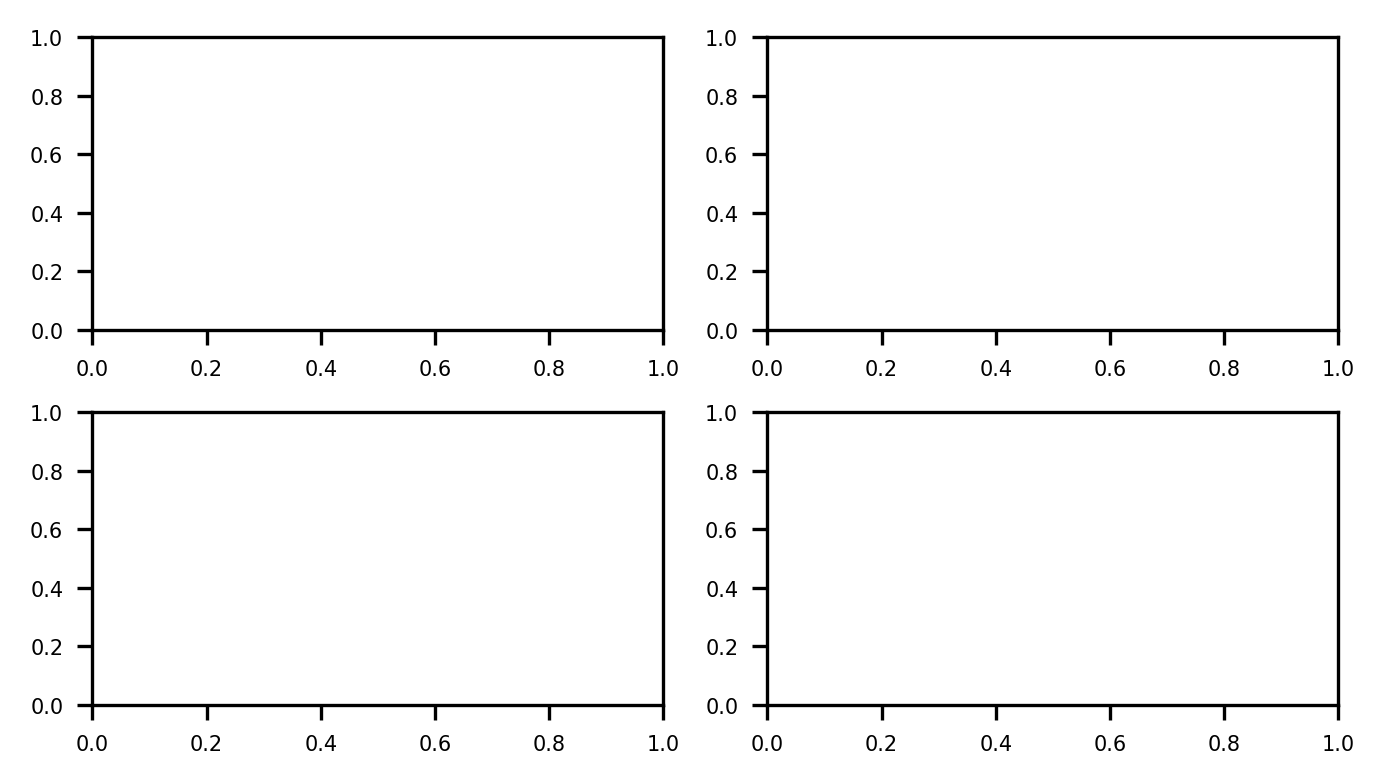

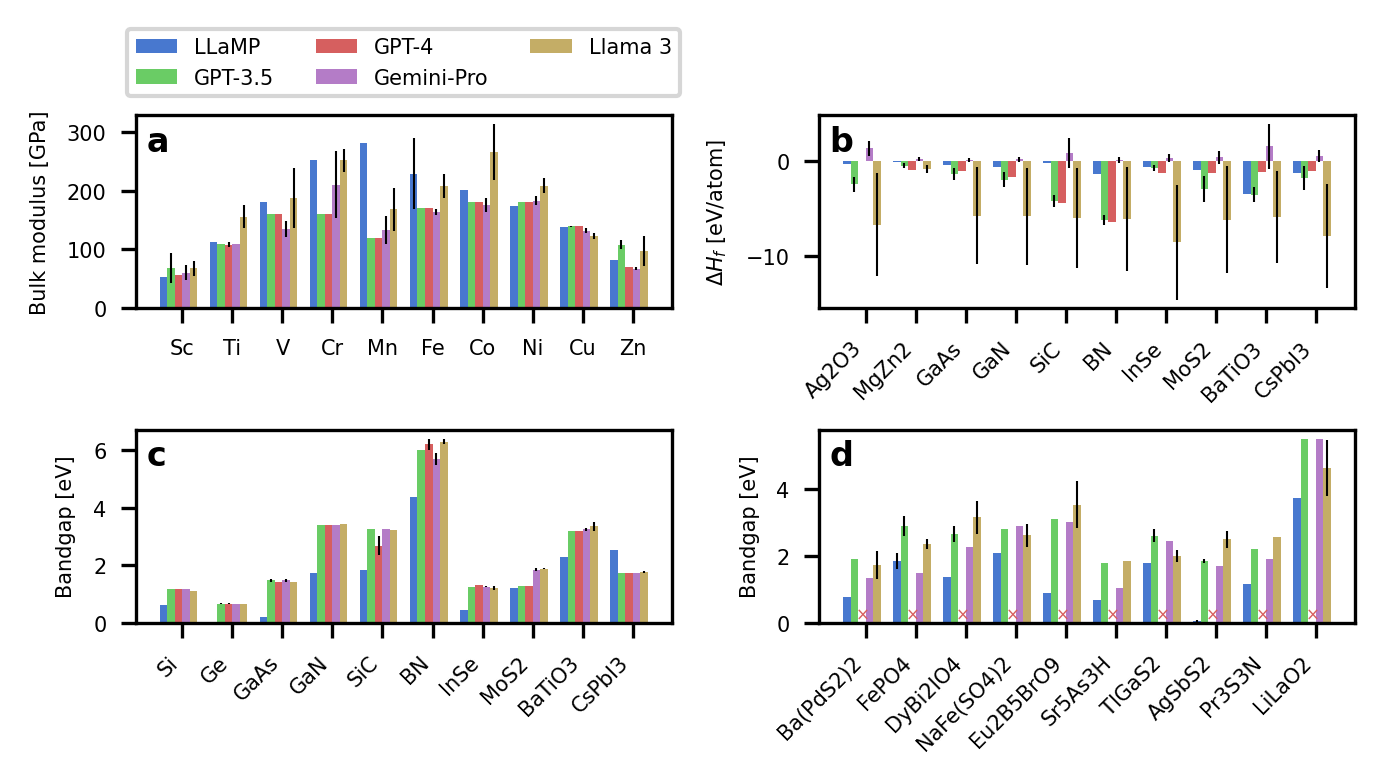

In [96]:


style = "seaborn-v0_8-muted"
# style = "default"
width = 0.15

SMALL_SIZE = 5
MEDIUM_SIZE = 6
LARGE_SIZE = 8

plt.rcParams.update({
    # "font.family": "sans-serif",
    # "font.sans-serif": ["Helvetica"],
    "font.size": SMALL_SIZE,
    # "axes.labelsize": 8,
    # "axes.titlesize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
    # "legend.fontsize": 8,
    "figure.dpi": 300,
    "savefig.dpi": 300,
})

with plt.style.context(style):

    fig, axes = plt.subplot_mosaic(
        """
        ab
        cd
        """,
        constrained_layout=True,
        figsize=(4.5, 2.5)
    )

    print("========== 3a bulk modulus ==========")

    iax = 'a'

    llamp = np.array([
        # [45.528, 112.881, 181.232, 252.155, 280.959, 295.605, 200.587, 197.345, 151.394, 85.872],
        [53.18, 112.881, 181.232, 252.155, 280.959, 207.093, 200.587, 173.808, 137.832, 82.872],
        [53.18, 112.881, 181.232, 252.155, 280.959, 295.605, 200.587, 173.808, 137.832, 82.872],
        [53.18, 112.881, 181.232, 252.155, 280.959, 295.605, 200.587, 173.808, 137.832, 82.872],
        [53.18, 112.881, 181.232, 252.155, 280.959, 137.541, 200.587, 173.808, 137.832, 82.872],
        [53.18, 112.881, 181.232, 252.155, 280.959, 207.093, 200.587, 173.808, 137.832, 82.872],
    ])
    gpt35 = np.array([
        # [55, 110, 160, 160, 120, 170, 180, 180, 140, 70],
        [57, 110, 160, 160, 120, 170, 180, 180, 140, 100],
        [57, 110, 160, 160, 120, 170, 180, 180, 140, 100],
        [56, 110, 160, 160, 120, 170, 180, 180, 140, 120],
        [56, 110, 160, 160, 120, 170, 180, 180, 137, 110],
        [120, 110, 160, 160, 120, 170, 180, 180, 140, 110],
    ])
    gpt4 = np.array([
        [57, 100, 160, 160, 120, 170, 180, 180, 140, 70],
        [56.6, 110, 160, 160, 120, 170, 180, 180, 140, 70],
        [56.6, 110, 160, 160, 120, 170, 180, 180, 140, 70],
        [56.6, 110, 160, 160, 120, 170, 180, 180, 140, 70],
        [56.6, 110, 160, 160, 120, 170, 180, 180, 140, 70]
    ])
    gemini = np.array([
        [56, 110, 128, 160, 124, 160, 170, 186, 130, 65],
        [40, 110, 129, 170, 119, 170, 170, 186, 140, 70],
        [76, 110, 128, 160, 179, 168, 170, 170, 130, 65],
        [63.5, 110, 128, 279, 120, 160, 170, 180, 130, 70],
        [68, 110, 162, 279, 122, 160, 199, 192, 130, 65]
    ])
    llama3 = np.array([
        [43.5, 116.6, 134.4, 235, 135, 167.5, 225, 185, 127, 71.5], # some are averaged from range
        [76, 165, 232.5, 275, 220, 211, 322.5, 219.0, 120, 110],
        [76, 165, 117.0, 235, 120, 220, 220, 210, 115, 65],
        [76.5, 165, 216, 235, 175, 220.5, 235, 220, 130, 106.5],
        [70, 165, 237.5, 275, 192.0, 217.5, 322.5, 207, 120, 135]
    ])

    data = {
        "LLaMP": llamp,
        "GPT-3.5": gpt35,
        "GPT-4": gpt4,
        "Gemini-Pro": gemini,
        "Llama 3": llama3
    }

    cmap = {k: f"C{i}" for i, k in enumerate(data)}

    columns=["Sc", "Ti", "V", "Cr", "Mn", "Fe", "Co", "Ni", "Cu", "Zn"]

    x = np.arange(len(columns))
    factor = len(data)*1.0 / 2.0
    # ref = np.nanmean(llamp, axis=0)
    ref = np.array([54.533, 112.944, 181.232, 233.652, 248.693, 295.605, 200.587, 197.345, 137.832, 85.872])

    for i, (name, values) in enumerate(data.items()):
        
        prec, cop, conf, scr = metrics(values)

        avg, std = np.nanmean(values, axis=0), np.nanstd(values, axis=0)
        acc = np.nanmean(np.abs(values - ref), axis=0)

        print(f"{name:10s} | prec: {np.nanmean(prec):6.3f} | cop: {np.nanmean(cop):6.3f} | conf: {np.nanmean(conf):6.3f} | scr: {np.nanmean(scr):6.3f} | acc: {np.nanmean(acc):6.3f}")
        axes[iax].bar(
            x=x + i*width - width*factor,  # Adjust the x positions
            height=avg,
            yerr=std,
            width=width,
            error_kw=dict(lw=0.5, capsize=0, capthick=0),
            label=f'{name}',
            color=cmap[name]
        )

    axes[iax].set(
        xticks=x,
        xticklabels=columns,
        ylabel="Bulk modulus [GPa]"
    )
    axes[iax].text(
        0.02,
        0.95,
        iax,
        fontdict={"weight": "bold", "size": LARGE_SIZE},
        transform=axes[iax].transAxes,
        ha="left",
        va="top",
    )
    axes[iax].legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=len(data)/2+1)
    # axes[i].legend(loc="upper right", frameon=False)

    print("========== 3b formation energy ==========")

    iax = 'b'

    llamp = np.array([
        [-0.35264, -0.130630305, -0.44627705625000047, -0.670049406875, -0.2039, -1.4129789931250016, -0.6767, -0.9655, -3.4897, -1.295464193931037],
        [np.nan, -0.130630305, -0.44627705625000047, -0.670049406875, -0.2039, -1.4129789931250016, -0.6767, -0.9655, -3.4897, -1.295464193931037],
        [np.nan, -0.13063, -0.44628, -0.67005, -0.20388, -1.41298, -0.67673, -0.96550, -3.48970, -1.29546],
        [-0.35264, -0.130630, -0.446, -0.670049406875, -0.20388216661842162, -1.4129789931250016, -0.6455260882812475, -0.9655, -3.4897, -1.295464193931037],
    ])
    gpt35 = np.array([
        [-3.58, -0.47, -1.10, -1.70, -4.24, -6.66, -1.31, -2.60, -3.36, -0.10],
        [-1.45, -0.39, -0.57, -1.72, -3.17, -6.56, -0.55, -3.71, -4.83, -2.01],
        [-1.94, -0.94, -2.18, -3.31, -4.88, -6.28, -0.69, -4.56, -2.67, -3.74],
        [-2.95, -0.21, -1.81, -1.13, -4.46, -5.41, -0.39, -0.92, -3.29, -1.35]
    ])
    gpt4 = np.array([
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        [np.nan, -0.9, -1.04, -1.74, -4.46, -6.4, -1.3, -1.3, -1.2, -1.1],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    ])
    gemini = np.array([
        [1.7, 0.2, 0.12, 0.6, 0.6, 0.2, 0.3, 0.4, 0.8, 0.6],
        [2.3215584, 0.1450974, 0.4974768, 0.103641 , 3.4823376, 0.5285691, 1.03641  , 1.5131586, 5.5862499, 1.5235227],
        [1.0571382 , 0.5078409 , 0.00497477, 0.01181507, 0.03129958, 0.05959357, 0.01305877, 0.01958815, 0.01243692, 0.01792989],
        [0.24, -0.04, -0.03, -0.01, -0.63, -0.28, 0.04, -0.42, -0.29, -0.05]

    ])
    llama3 = np.array([
        # raw [-1116, -44.6, -1041, -1076, -1020, -1042, -1234, -1045, -944, -1127] # kJ/mol
        [-11.5663356, -0.46223886, -10.7890281, -11.1517716, -10.571382, -10.7993922, -12.7892994, -10.8304845, -9.7837104, -11.6803407],
        # raw [-112.8, -105.6, -115.5, -113.3, -104.3, -104.1, np.nan, -91.4, -101.5, np.nan]
        [-1.16907048, -1.09444896, -1.19705355, -1.17425253, -1.08097563, -1.07890281, np.nan, -0.94727874, -1.05195615, np.nan],
        [-1.39293504, -0.37103478, -0.13991535, -0.25599327, -0.44876553, -0.22697379, -0.00362743, -0.23941071, -1.19290791, -0.11815074],
        [-12.6960225 ,  -1.49864886, -10.90717884, -10.78384605, -11.94773448, -12.44106564, -12.91263219, -12.78308094, -11.73734325, -11.87829501]
    ])

    data = {
        "LLaMP": llamp,
        "GPT-3.5": gpt35,
        "GPT-4": gpt4,
        "Gemini-Pro": gemini,
        "Llama 3": llama3
    }

    cmap = {k: f"C{i}" for i, k in enumerate(data)}

    columns=["Ag2O3", "MgZn2", "GaAs", "GaN", "SiC", "BN", "InSe", "MoS2", "BaTiO3", "CsPbI3"]

    x = np.arange(len(columns))
    factor = len(data)*1.0 / 2.0
    # ref = np.nanmean(llamp, axis=0)
    ref = np.array([-0.352642995166665, -0.130630305, -0.44627705625000047, -0.670049406875, -0.203860315720589, -1.4129789931250016, -0.676726512031248,-0.965501308541666, -3.4896553571666344, -1.295464193931037])



    for i, (name, values) in enumerate(data.items()):
        
        prec, cop, conf, scr = metrics(values)

        avg, std = np.nanmean(values, axis=0), np.nanstd(values, axis=0)
        acc = np.nanmean(np.abs(values - ref), axis=0)

        print(f"{name:10s} | prec: {np.nanmean(prec):6.3f} | cop: {np.nanmean(cop):6.3f} | conf: {np.nanmean(conf):6.3f} | scr: {np.nanmean(scr):6.3f} | acc: {np.nanmean(acc):6.3f}")

        axes[iax].bar(
            x=x + i*width - width*factor,  # Adjust the x positions
            height=avg,
            yerr=std,
            width=width,
            error_kw=dict(lw=0.5, capsize=0, capthick=0),
            label=f'{name}',
            color=cmap[name]
        )

    axes[iax].set(
        xticks=x,
        ylabel="$\Delta H_f$ [eV/atom]"
    )
    axes[iax].set_xticklabels(columns, rotation=45, ha='right')

    axes[iax].text(
        0.02,
        0.95,
        iax,
        fontdict={"weight": "bold", "size": LARGE_SIZE},
        transform=axes[iax].transAxes,
        ha="left",
        va="top",
    )

    print("========== 3c band gap ==========")

    iax = 'c'

    llamp = np.array([
        [0.6105, 0.0, 0.1861, 1.7265, 1.8389, 4.3683, 0.459, 1.2042, 2.293, 2.5181],
        [0.6105, 0.0, 0.1861, 1.7265, 1.8389, 4.3683, 0.459, 1.2042, 2.293, 2.5181],

    ])
    gpt35 = np.array([
        [1.17, 0.67, 1.42, 3.4, 3.26, 6.0, 1.26, 1.29, 3.2, 1.73],
        [1.17, 0.66, 1.52, 3.39, 3.26, 6.0, 1.26, 1.29, 3.2, 1.73]
    ])
    gpt4 = np.array([
        [1.17, 0.67, 1.42, 3.4, 2.36, 6.0, 1.3, 1.29, 3.2, 1.73],
        [1.17, 0.66, 1.43, 3.4, 3.0, 6.4, 1.3, 1.29, 3.2, 1.73],
    ])
    gemini = np.array([
        [1.17, 0.66, 1.52, 3.4, 3.26, 5.9, 1.27, 1.8, 3.3, 1.73],
        [1.17, 0.66, 1.42, 3.4, 3.26, 5.5, 1.25, 1.9, 3.2, 1.73],
    ])
    llama3 = np.array([
        [1.12, 0.64, 1.42, 3.44, 3.23, 6.2, 1.27, 1.89, 3.5, 1.73],
        [1.12, 0.66, 1.42, 3.44, 3.23, 6.4, 1.15, 1.88, 3.2, 1.8],
    ])

    data = {
        "LLaMP": llamp,
        "GPT-3.5": gpt35,
        "GPT-4": gpt4,
        "Gemini-Pro": gemini,
        "Llama 3": llama3
    }

    cmap = {k: f"C{i}" for i, k in enumerate(data)}

    columns=["Si", "Ge", "GaAs", "GaN", "SiC", "BN", "InSe", "MoS2", "BaTiO3", "CsPbI3"]

    x = np.arange(len(columns))
    factor = len(data)*1.0 / 2.0
    ref = np.array([0.6105, 0.0, 0.18610000000000015, 1.7264999999999997, 1.8389000000000006, 4.3683, 0.4590000000000001, 1.2042000000000002, 2.2929999999999997, 2.5181])

    for i, (name, values) in enumerate(data.items()):
        
        prec, cop, conf, scr = metrics(values)

        avg, std = np.nanmean(values, axis=0), np.nanstd(values, axis=0)
        acc = np.nanmean(np.abs(values - ref), axis=0)

        print(f"{name:10s} | prec: {np.nanmean(prec):6.3f} | cop: {np.nanmean(cop):6.3f} | conf: {np.nanmean(conf):6.3f} | scr: {np.nanmean(scr):6.3f} | acc: {np.nanmean(acc):6.3f}")

        axes[iax].bar(
            x=x + i*width - width*factor,  # Adjust the x positions
            height=avg,
            yerr=std,
            width=width,
            error_kw=dict(lw=0.5, capsize=0, capthick=0),
            label=f'{name}',
            color=cmap[name]
        )

    axes[iax].set(
        xticks=x,
        ylabel="Bandgap [eV]"
    )
    axes[iax].set_xticklabels(columns, rotation=45, ha='right')

    axes[iax].text(
        0.02,
        0.95,
        iax,
        fontdict={"weight": "bold", "size": LARGE_SIZE},
        transform=axes[iax].transAxes,
        ha="left",
        va="top",
    )

    print("========== 3d band gap multiele ==========")

    iax = 'd'

    llamp = np.array([
        [0.779, 1.67, 1.37, 2.0944, 0.8801, 0.676, 1.7885, 0.076, 1.1501, 3.7336],
        [0.779, 1.67, 1.37, 2.094, 0.8801, 0.676, 1.7885, 0.076, 1.1501, 3.7336],
        [0.779, 2.1932, 1.367, np.nan, 0.8801, 0.676, 1.7885, 0.0, 1.1501, np.nan]
    ])
    gpt35 = np.array([
        [np.nan, 3.2, 2.9, np.nan, np.nan, np.nan, 2.8, 1.9, np.nan, np.nan],
        [1.91, 2.6, 2.4, 2.8, 3.1, 1.8, 2.4, 1.8, 2.2, 5.5],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],

    ])
    gpt4 = np.array([
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
    ])
    gemini = np.array([
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
        [1.35, 1.5, 2.25, 2.9, 3.0, 1.05, 2.45, 1.7, 1.9, 5.5],
        [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],

    ])
    llama3 = np.array([
        [2.3, 2.5, 2.7, 3.1, 4.5, np.nan, 1.8, 2.4, np.nan, 3.5],
        [1.5, (2.2 + 2.6) / 2, (2.8 + 3.0) / 2, (2.1 + 2.5) / 2, (2.7 + 3.1) / 2, np.nan, (2.0 + 2.5) / 2, (2.6 + 3.1) / 2, np.nan, (5.0 + 6.0) / 2],
        [1.35, 2.14, 3.85, 2.43, 3.17, 1.85, 1.95, 2.25, 2.55, 4.85]
    ])

    data = {
        "LLaMP": llamp,
        "GPT-3.5": gpt35,
        "GPT-4": gpt4,
        "Gemini-Pro": gemini,
        "Llama 3": llama3
    }

    cmap = {k: f"C{i}" for i, k in enumerate(data)}

    columns=["Ba(PdS2)2", "FePO4", "DyBi2IO4", "NaFe(SO4)2", "Eu2B5BrO9", "Sr5As3H", "TlGaS2", "AgSbS2", "Pr3S3N", "LiLaO2"]

    x = np.arange(len(columns))
    factor = len(data)*1.0 / 2.0
    ref = np.array(
        [0.7791999999999999, 2.1932, 1.3667999999999996, 2.0944, 0.8801, 0.6763999999999997, 1.7885, 1.3716000000000004, 1.1501, 3.6258000000000004],
    )


    for i, (name, values) in enumerate(data.items()):
        
        prec, cop, conf, scr = metrics(values)

        avg, std = np.nanmean(values, axis=0), np.nanstd(values, axis=0)
        acc = np.nanmean(np.abs(values - ref), axis=0)

        print(f"{name:10s} | prec: {np.nanmean(prec):6.3f} | cop: {np.nanmean(cop):6.3f} | conf: {np.nanmean(conf):6.3f} | scr: {np.nanmean(scr):6.3f} | acc: {np.nanmean(acc):6.3f}")

        axes[iax].bar(
            x=x + i*width - width*factor,  # Adjust the x positions
            height=avg,
            yerr=std,
            width=width,
            error_kw=dict(lw=0.5, capsize=0, capthick=0),
            label=f'{name}',
            color=cmap[name]
        )
        # if np.isnan(avg).any():
        for j, v in enumerate(avg):
            if np.isnan(v):
                axes[iax].text(
                    x=x[j] + i*width - width*factor, y=0, 
                    s='$\\times$', ha='center', va='bottom',
                    fontsize=SMALL_SIZE*0.8, color=cmap[name]
                )

    axes[iax].set(
        xticks=x,
        ylabel="Bandgap [eV]"
    )
    axes[iax].set_xticklabels(columns, rotation=45, ha='right')

    axes[iax].text(
        0.02,
        0.95,
        iax,
        fontdict={"weight": "bold", "size": LARGE_SIZE},
        transform=axes[iax].transAxes,
        ha="left",
        va="top",
    )

    # i = 'd'

    # bandgaps = pd.DataFrame.from_dict(
    #     data={
    #         "LLaMP": [0.779, 2.1932, 1.367, 2.094, 0.88, 0.676, 1.7885, 1.372, 1.15, 3.7336],
    #         "GPT-3.5": [pd.NA, pd.NA, pd.NA, pd.NA, pd.NA, pd.NA, pd.NA, pd.NA, pd.NA, pd.NA]
    #     },
    #     orient='index',
    #     columns=["Ba(PdS2)2", "FePO4", "DyBi2IO4", "NaFe(SO4)2", "Eu2B5BrO9", "Sr5As3H", "TlGaS2", "AgSbS2", "Pr3S3N", "LiLaO2"]
    # )

    # x = np.arange(len(bandgaps.columns))

    # axes[i].bar(
    #     x=x - width/2, height=bandgaps.loc['LLaMP'], width=width, label='LLaMP / MP (DFT)'
    # )
    # for j, v in enumerate(bandgaps.loc['GPT-3.5']):
    #     if pd.isna(v):
    #         axes[i].text(
    #             x=x[j] + width/2, y=0, s='$\\times$', ha='center', va='bottom'
    #         )
    #         # axes[i].bar(
    #         #     x=x[j] + width/2, height=0, width=width, label='GPT-3.5 (intrinsic)'
    #         # )
    # # axes[i].bar(
    # #     x=x + width/2, height=bandgaps.loc['GPT-3.5'], width=width, label='GPT-3.5 (intrinsic)'
    # # )

    # axes[i].set(
    #     xticks=x,
    #     ylabel="Bandgap [eV]"
    # )
    # axes[i].set_xticklabels(bandgaps.columns, rotation=45, ha='right')

    # axes[i].text(
    #     0.02,
    #     0.95,
    #     i,
    #     fontdict={"weight": "bold", "size": LARGE_SIZE},
    #     transform=axes[i].transAxes,
    #     ha="left",
    #     va="top",
    # )

    plt.savefig("03.pdf")
    plt.savefig("/Users/la-cyrusyc/Dropbox/Apps/Overleaf/LLaMP/fig/03.pdf")
    plt.show()
    

In [49]:
plt.rcParams.items

<bound method Mapping.items of RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
        